# Appendix 2: Redefining the stellar edge and resampling

Hannu Parviainen

The spherical models extend quite a bit over what we'd consider the 'edge' of the star. Thus, the edge needs to be (re)defined, and the z and $\mu$ need to be recomputed using the new edge distance. Also, while the used $\mu$ sampling works to capture the detail close to the stellar limb, it is not optimal for LD model fitting, as it gives way too much weight to the very edge.

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [9]:
from scipy.interpolate import interp1d
from os.path import join
import seaborn as sb
sb.set_style('white')

from ldtk import SIS, ldtk_cache

In [10]:
sis = SIS(join(ldtk_cache,'Z-0.0/lte05500-4.50-0.0.PHOENIX-ACES-AGSS-COND-SPECINT-2011.fits'))
mu_o, z_o, ip_o = sis.mu, sis.z, sis.intensity_profile()

## Redefining the stellar edge

In [11]:
def plot_ld(mu, z, ip, mu_range=(-0.01,1.01), ylim=(-0.01,1.01)):
    fig,ax = subplots(1,2,figsize=(13,4), sharey=True)
    ax[0].plot(mu, ip)
    ax[0].scatter(mu, ip, marker='o')
    ax[1].plot(z, ip)
    ax[1].scatter(z, ip, marker='o')
    setp(ax, xlim=(0,1.01), ylim=ylim)
    setp(ax[0], xlim=mu_range, xlabel='$\mu$')
    setp(ax[1], xlim=sqrt(1- clip(array(mu_range)**2,-5,1))[::-1], xlabel='z')
    fig.tight_layout()
    return fig,ax

Let's first plot the stellar intensity profile as a function of $\mu$ and $z$, and take a closer look at what happens near the edge.

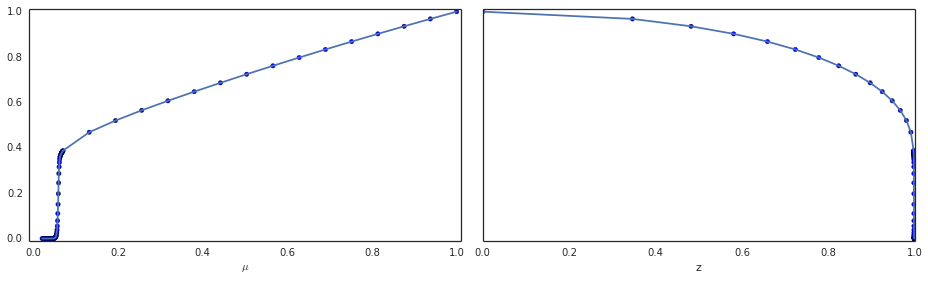

In [12]:
plot_ld(mu_o, z_o, ip_o);

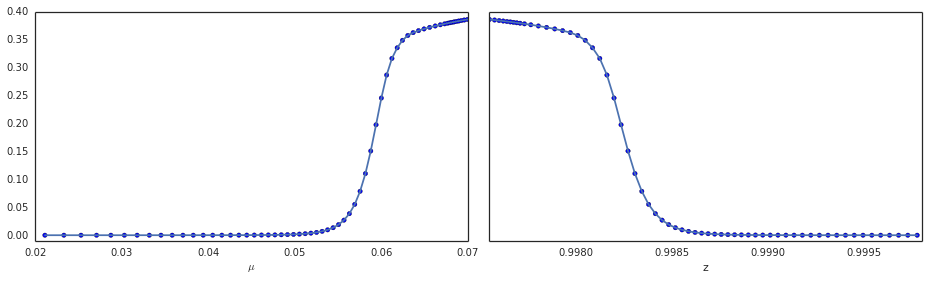

In [13]:
plot_ld(mu_o, z_o, ip_o, mu_range=(0.02,0.07), ylim=(-0.01,0.4));

It's clear that the sampling continues over the stellar edge. We need to fix this by redefining the edge and recalculating the $z$ and $\mu$ values. I choose the same approach as chosen in XXXX (2014): we define the edge to correspond to the ...

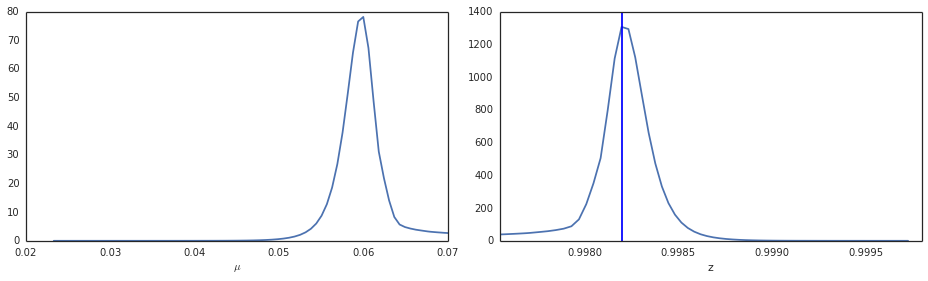

In [14]:
ipm = argmax(abs(diff(sis.intensity_profile())/diff(sis.z)))
fig,ax = subplots(1,2,figsize=(13,4), sharey=False)
ax[0].plot(sis.mu[1:], abs(diff(sis.intensity_profile())/diff(sis.mu)))
#ax[0].scatter(sis.mu, sis.intensity_profile(), marker='o')
ax[1].plot(sis.z[1:], abs(diff(sis.intensity_profile())/diff(sis.z)))
#ax[1].scatter(sis.z, sis.intensity_profile(), marker='o')
ax[1].axvline(sis.z[ipm+1])
setp(ax[0], xlabel='$\mu$', xlim=(0.02,0.07))
setp(ax[1], xlabel='z', xlim=sqrt(1-array((0.02,0.07))**2)[::-1])
#setp(ax[1], xlim=(0.9,1.001))
fig.tight_layout()

In [15]:
i = argmax(abs(diff(ip_o)/diff(z_o)))
z_new  = z_o[i:]/z_o[i]
mu_new = sqrt(1-z_new**2)
ip_new = ip_o[i:]

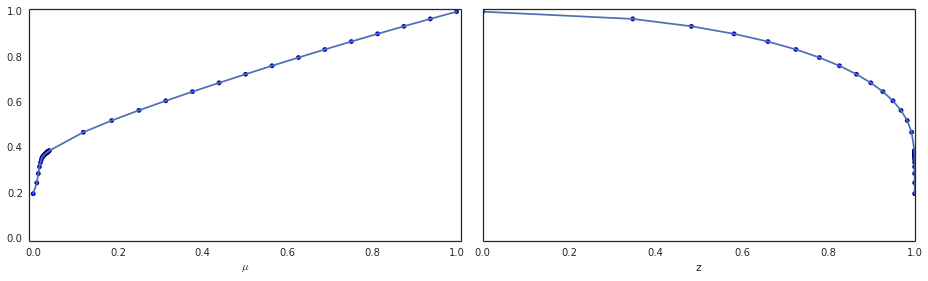

In [16]:
plot_ld(mu_new, z_new, ip_new);

## Resampling 

Show how the best-fit model changes as a function of resampling.

In [17]:
z_rs = linspace(0,1,100)
mu_rs = sqrt(1-z_rs**2)
ip_rs = interp1d(z_new[::-1], ip_new[::-1], kind='linear', assume_sorted=True)(z_rs)

In [18]:
ip_f1 = poly1d(polyfit(mu_new, ip_new, 2))(mu_rs)
ip_f2 = poly1d(polyfit(mu_rs,  ip_rs,  2))(mu_rs)

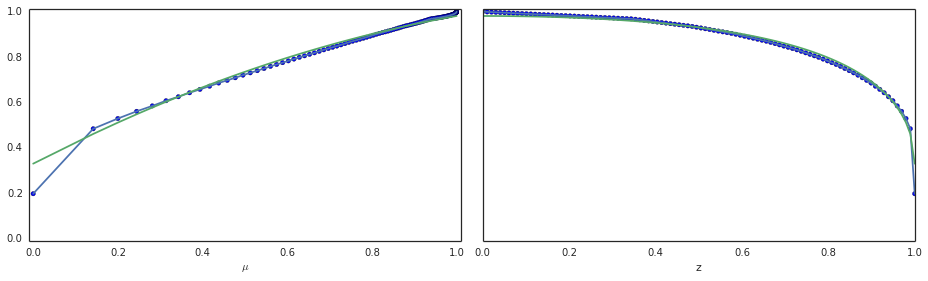

In [19]:
fig,ax = plot_ld(mu_rs, z_rs, ip_rs);
ax[0].plot(mu_rs, ip_f1)
ax[1].plot(z_rs,  ip_f1);

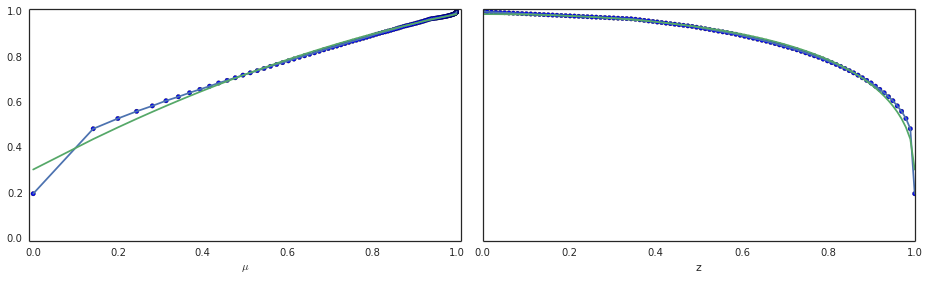

In [20]:
fig,ax = plot_ld(mu_rs, z_rs, ip_rs);
ax[0].plot(mu_rs, ip_f2)
ax[1].plot(z_rs, ip_f2);

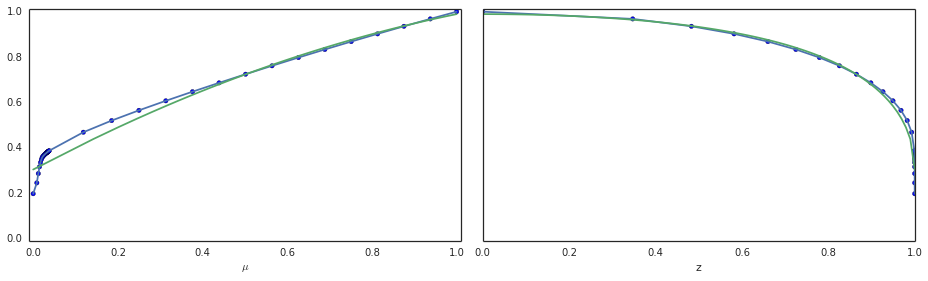

In [21]:
fig,ax = plot_ld(mu_new, z_new, ip_new);
ax[0].plot(mu_rs, ip_f2)
ax[1].plot(z_rs, ip_f2);

---
<center> &copy; 2015 <a href="mailto:hannu.parviainen@physics.ox.ac.uk">Hannu Parviainen</a></center>